In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import argparse
import tensorflow
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
print("num of GPU : ",len(tensorflow.config.experimental.list_physical_devices('GPU')))

num of GPU :  1


In [5]:
img_size=150

In [6]:
my_model=Sequential()
my_model.add(Conv2D(64, kernel_size=7, strides=1, activation='relu', input_shape=[img_size,img_size,1]))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Conv2D(64, kernel_size=7, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=3, strides=1, activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Conv2D(256, kernel_size=3, strides=2, activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(27, activation='softmax'))
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 144, 144, 64)      3200      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)        200768    
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 256)       147712    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 256)        

In [7]:
TRAINING_DIR = r'C:\Users\Steve Adel\cnn object detection\Train'
TEST_DIR = r'C:\Users\Steve Adel\cnn object detection\Test'

In [8]:
IMAGE_SIZE = 150
BATCH_SIZE = 256

data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    validation_split=0.1
)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical',color_mode="grayscale", batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical',color_mode="grayscale", batch_size=BATCH_SIZE, subset="validation")

Found 97200 images belonging to 27 classes.
Found 10800 images belonging to 27 classes.


In [9]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = my_model.fit(train_generator,
                        epochs=10,
                        validation_data=validation_generator)

Epoch 1/10
380/380 [==============================] - 303s 765ms/step - loss: 0.4311 - accuracy: 0.8679 - val_loss: 0.1023 - val_accuracy: 0.9748
Epoch 2/10
380/380 [==============================] - 225s 592ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0881 - val_accuracy: 0.9844
Epoch 3/10
380/380 [==============================] - 204s 536ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 4/10
380/380 [==============================] - 212s 558ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0310 - val_accuracy: 0.9915
Epoch 5/10
380/380 [==============================] - 217s 570ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0445 - val_accuracy: 0.9854
Epoch 6/10
380/380 [==============================] - 217s 570ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0752 - val_accuracy: 0.9851
Epoch 7/10
380/380 [==============================] - 211s 555ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0503 -

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


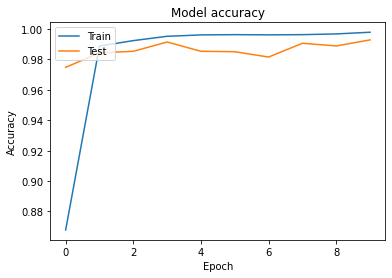

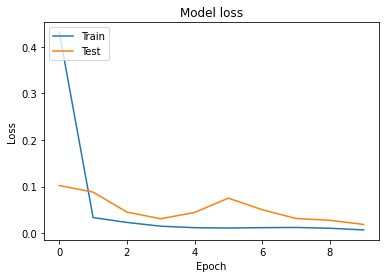

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
test_generator = data_generator.flow_from_directory(TEST_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=False, seed=123,
                                                     class_mode='categorical',color_mode="grayscale", batch_size=BATCH_SIZE)

Found 13608 images belonging to 27 classes.


In [40]:
my_model.evaluate(test_generator)

54/54 [==============================] - 24s 435ms/step - loss: 0.0383 - accuracy: 0.9866


[0.03832379728555679, 0.9865520000457764]

In [41]:
y_pred = my_model.predict(test_generator,verbose=1)

54/54 [==============================] - 25s 456ms/step


array([[9.9922204e-01, 2.6362124e-11, 1.3389359e-07, ..., 3.5445971e-06,
        5.5643562e-07, 8.3936972e-12],
       [9.9883264e-01, 1.5353788e-11, 3.1261209e-07, ..., 2.4685789e-06,
        1.1681633e-06, 9.6488147e-12],
       [9.9771345e-01, 1.1059393e-10, 1.6683094e-06, ..., 3.1132502e-06,
        2.2988727e-06, 6.0951244e-11],
       ...,
       [4.2114318e-20, 2.5779985e-16, 6.0593539e-19, ..., 1.3846180e-15,
        4.9016883e-13, 1.0000000e+00],
       [4.1912059e-20, 2.5127330e-16, 5.8422479e-19, ..., 1.5916744e-15,
        6.5858354e-13, 1.0000000e+00],
       [3.9557909e-20, 2.2153653e-16, 5.6120089e-19, ..., 1.5029025e-15,
        6.5597967e-13, 1.0000000e+00]], dtype=float32)

In [42]:
y_test = test_generator.classes
y_test

array([ 0,  0,  0, ..., 26, 26, 26])

In [35]:
predicted,confidence = [np.argmax(i) for i in y_pred],[np.round((max(i)*100),27) for i in y_pred]


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
import seaborn as sns


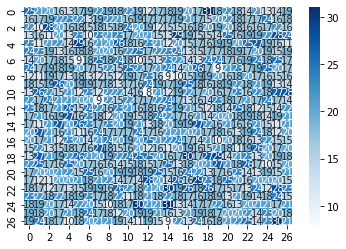

In [27]:
sns.heatmap(confusion_matrix(predicted,y_test),annot=True,fmt="d",cmap="Blues");


In [43]:
my_model.save('handsign.model')

INFO:tensorflow:Assets written to: handsign.model\assets
